In [ ]:
pip install Faker

     |████████████████████████████████| 1.5 MB 8.5 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from faker import Faker

In [ ]:
fake = Faker()

In [ ]:
import pandas as pd
data = pd.read_csv('bike_buyers_clean.csv')
data.head(10)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,27974,Single,Male,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,22155,Married,Male,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,19280,Married,Male,20000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,48,Yes


In [ ]:
Dummy1 = pd.get_dummies(data["Marital Status"])
Dummy2 = pd.get_dummies(data["Gender"])

In [ ]:
data = pd.concat((data, Dummy1, Dummy2), axis = 1)

In [ ]:
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Married,Single,Female,Male
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,1,0,1,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,1,0,0,1
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,1,0,0,1
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,0,1,0,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,1,0,0,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,0,1,0,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,1,0,0,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,0,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
 13  Married           1000 non-null   uint8 
 14  Single            1000 non-null   uint8 
 15  Female            1000 non-null   uint8 
 16  Male              1000 non-null   uint8 
dtypes: int64(5), ob

In [ ]:
data.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
Married              uint8
Single               uint8
Female               uint8
Male                 uint8
dtype: object

In [ ]:
data.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
Married             0
Single              0
Female              0
Male                0
dtype: int64

In [ ]:
data.describe()

,ID,Income,Children,Cars,Age,Married,Single,Female,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000,0.539000,0.461000,0.491000,0.509000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537,0.498726,0.498726,0.500169,0.500169
min,11000.000000,10000.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000,1.000000,0.000000,0.000000,1.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000,1.000000,1.000000,1.000000,1.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 9 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age', 'Married', 'Single', 'Female', 'Male']


In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [ ]:
'''
for var in numerical: 
    print(data[var].value_counts())
    print(data[var].value_counts()/np.float(len(data)))
    print()
'''

'\nfor var in numerical: \n    print(data[var].value_counts())\n    print(data[var].value_counts()/np.float(len(data)))\n    print()\n'

In [ ]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Marital Status  contains  2  labels
Gender  contains  2  labels
Education  contains  5  labels
Occupation  contains  5  labels
Home Owner  contains  2  labels
Commute Distance  contains  5  labels
Region  contains  3  labels
Purchased Bike  contains  2  labels


In [ ]:
'''
for var in categorical: 
    print(data[var].value_counts())
    print(data[var].value_counts()/np.float(len(data)))
    print()
'''

'\nfor var in categorical: \n    print(data[var].value_counts())\n    print(data[var].value_counts()/np.float(len(data)))\n    print()\n'

In [ ]:
label_encoder = LabelEncoder() 

data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Home Owner'] = label_encoder.fit_transform(data['Home Owner'])
data['Commute Distance'] = label_encoder.fit_transform(data['Commute Distance'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Purchased Bike'] = label_encoder.fit_transform(data['Purchased Bike'])
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Married,Single,Female,Male
0,12496,0,0,40000,1,0,4,1,0,0,0,42,0,1,0,1,0
1,24107,0,1,30000,3,3,0,1,1,0,0,43,0,1,0,0,1
2,14177,0,1,80000,5,3,3,0,2,3,0,60,0,1,0,0,1
3,24381,1,1,70000,0,0,3,1,1,4,2,41,1,0,1,0,1
4,25597,1,1,30000,0,0,0,0,0,0,0,36,1,0,1,0,1


In [ ]:
data.describe()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Married,Single,Female,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,0.461000,0.509000,56140.000000,1.908000,1.631000,2.259000,0.685000,1.452000,1.645000,0.89200,44.190000,0.481000,0.539000,0.461000,0.491000,0.509000
std,5347.333948,0.498726,0.500169,31081.609779,1.626094,1.353762,1.453283,0.464748,1.124705,1.561862,0.69341,11.353537,0.499889,0.498726,0.498726,0.500169,0.500169
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19744.000000,0.000000,1.000000,60000.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,43.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.00000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,29447.000000,1.000000,1.000000,170000.000000,5.000000,4.000000,4.000000,1.000000,4.000000,4.000000,2.00000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000


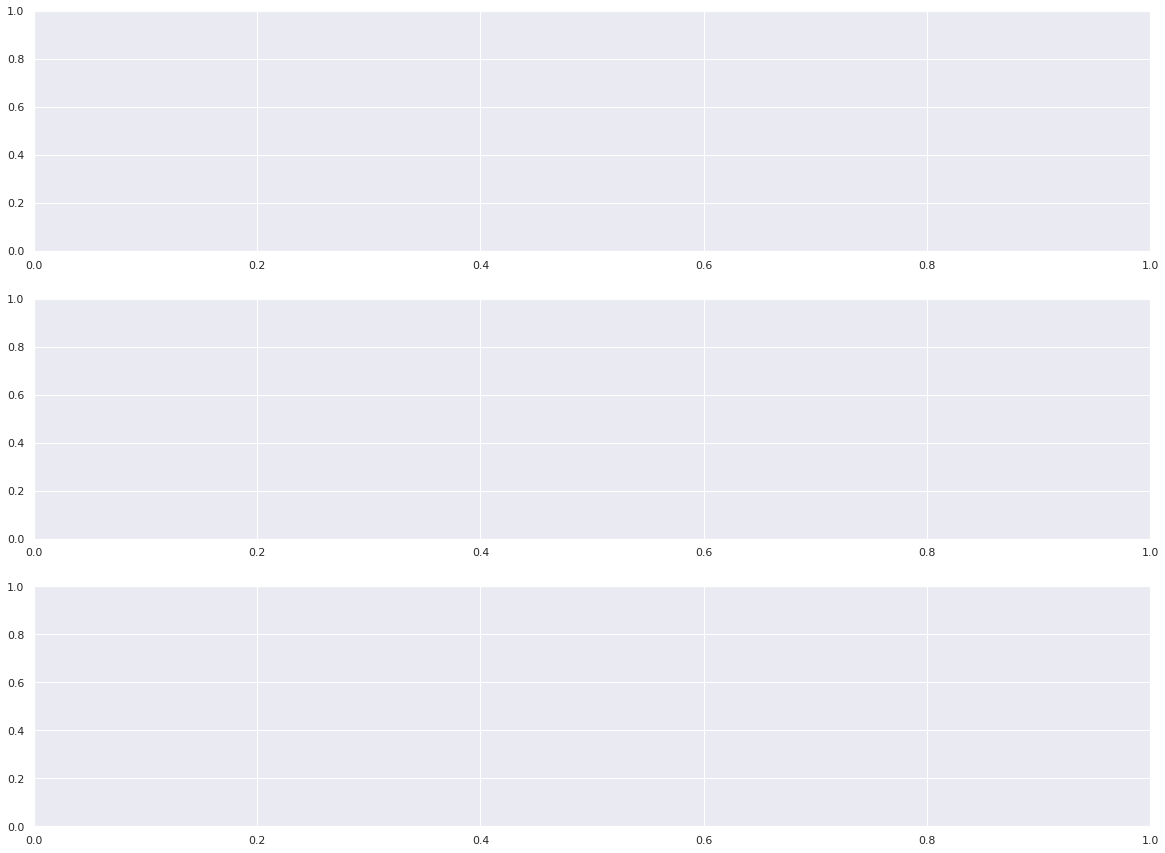

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})

# Using Matplotlib for Subploting
fig, axes = plt.subplots(3,1)

# Subploting Data Showing Income According to Region and Professin 
sns.kdeplot(data = data[data['Region'] == 'Europe'], x = 'Income', hue = 'Occupation', ax = axes[0])
sns.kdeplot(data = data[data['Region']=='North America'],x='Income', hue='Occupation', ax=axes[1])
sns.kdeplot(data = data[data['Region']=='Pacific'],x='Income', hue='Occupation', ax=axes[2])

In [ ]:
X = data.drop(['Purchased Bike'], axis=1)
y = data['Purchased Bike']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score: 0.6000


In [ ]:
y_pred_train2 = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train2)))


Training-set accuracy score: 0.6529


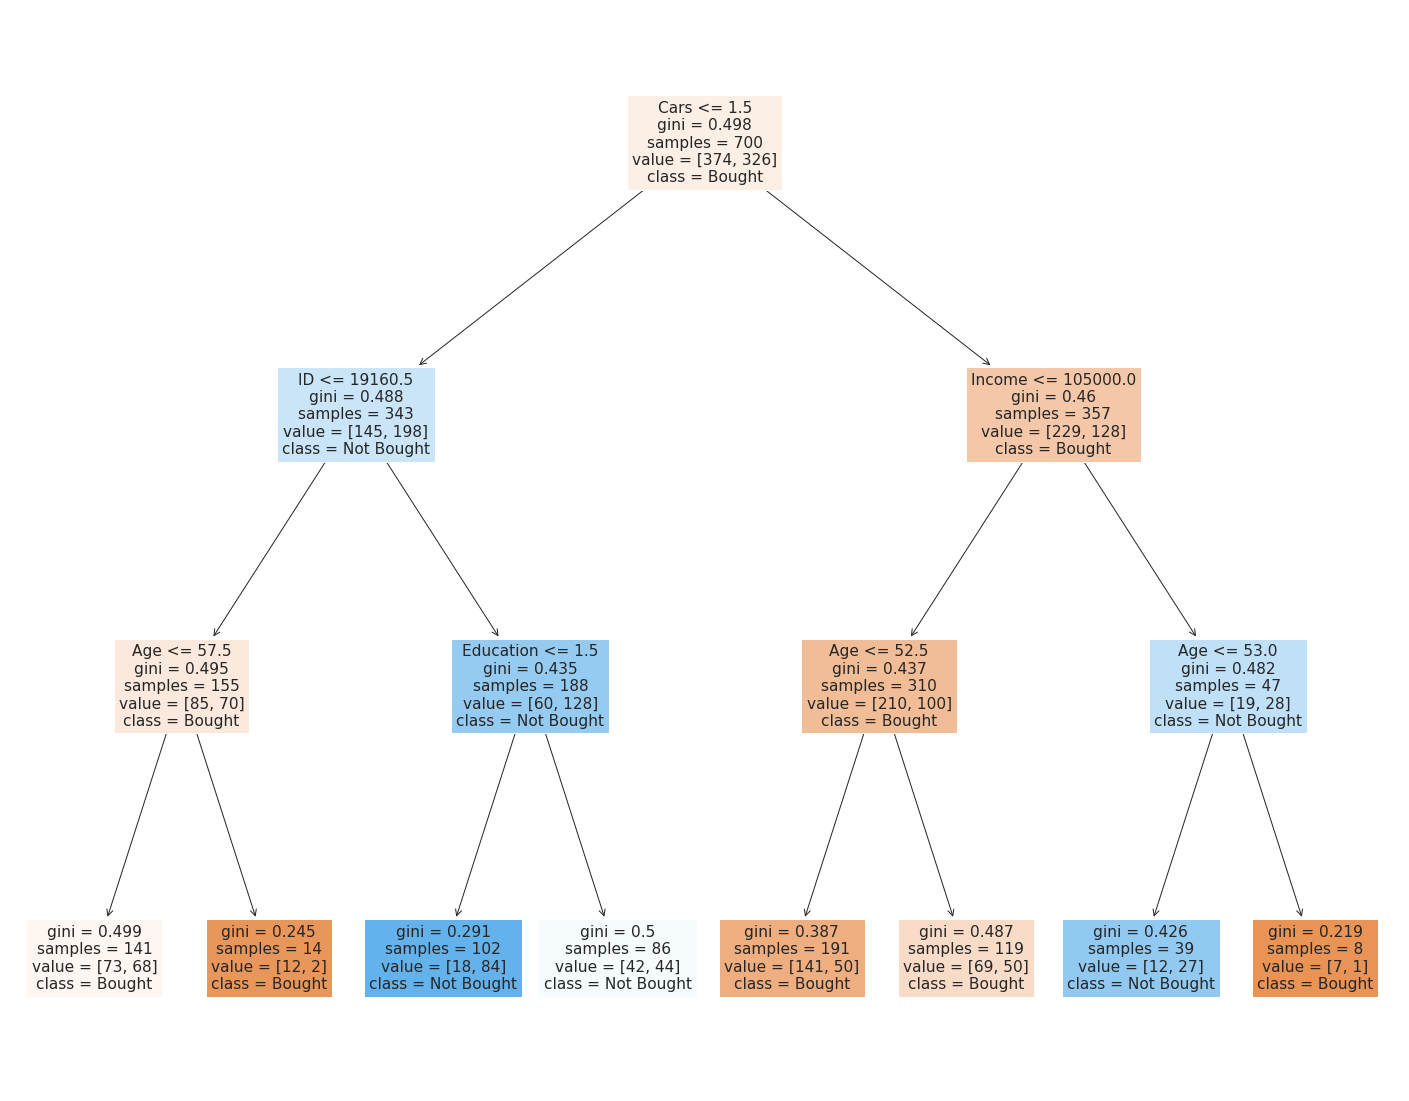

In [ ]:
from sklearn import tree

fn=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = fn, 
               class_names=cn, filled=True)